In [139]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


In [140]:
df = pd.read_csv('movies.csv')

We have already cleaned and explored the quantitative variables fairly extensively in our previous notebook (data_wrangling). We will now turn to categorical variables and do some further exploration on the affect of genre on revenue.

In [141]:

df.drop(labels=['Unnamed: 0'],axis=1,inplace=True)


In [142]:
df.head()

,budget,genres,original_language,popularity,release_date,runtime,Keywords,cast,crew,revenue,...,Universal Pictures,Warner Bros.,Metro-Goldwyn-Mayer (MGM),Fox,Columbia Pictures,Walt Disney Pictures,lang_num,has_tagline,cast_size,crew_size
0,14000000.0,"[{'id': 35, 'name': 'Comedy'}]",en,6.575393,2015-02-20,93.0,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,...,0,0,1,0,0,0,1.0,1,24.0,72.0
1,40000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",en,8.248895,2004-08-06,113.0,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,...,0,0,0,0,0,1,1.0,1,20.0,9.0
2,3300000.0,"[{'id': 18, 'name': 'Drama'}]",en,64.299990,2014-10-10,105.0,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000,...,0,0,0,0,0,0,1.0,1,51.0,64.0
3,1200000.0,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",hi,3.174936,2012-03-09,122.0,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000,...,0,0,0,0,0,0,2.0,0,7.0,3.0
4,NaN,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",ko,1.148070,2009-02-05,118.0,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970,...,0,0,0,0,0,0,1.0,0,4.0,2.0


In [143]:
df.columns

Index(['budget', 'genres', 'original_language', 'popularity', 'release_date',
       'runtime', 'Keywords', 'cast', 'crew', 'revenue', 'homepage_bool',
       'belongs_to_collection_bool', 'prod_companies', 'prod_country',
       'usa_production', 'Paramount Pictures', 'Universal Pictures',
       'Warner Bros.', 'Metro-Goldwyn-Mayer (MGM)', 'Fox', 'Columbia Pictures',
       'Walt Disney Pictures', 'lang_num', 'has_tagline', 'cast_size',
       'crew_size'],
      dtype='object')

In [144]:
df['release_date'] = df['release_date'].apply(pd.to_datetime)

In [145]:
df['year'] = df['release_date'].dt.year
df['month'] = df['release_date'].dt.month
df['weekday'] = (df['release_date'].dt.weekday < 5).astype(int)

In [146]:


def get_dictionary(s):
    try:
        d = eval(s)
    except:
        d = {}
    return d


In [147]:

df['genre_name'] = pd.Series(dtype='object')
j = 0
for i in df['genres']:
    d = get_dictionary(i)
    if d != {}:
        df['genre_name'].iloc[j] = [d[x]['name'] for x in range(0,len(d))]

    else:
         df['genre_name'].iloc[j] = np.NaN
    j += 1
df.is_copy = False

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [148]:
df.drop(labels=['genres'],axis=1,inplace=True)

We will examine the primary and secondary genres of each movie. Some movies have a large number of genres (5+), while the majority have just 1-2. Less than half have a third genre.

In [149]:
df['main_genre'] = ""
print(df['genre_name'].isna().sum())
df['genre_name'].fillna('None',inplace=True)
print(df['genre_name'].isna().sum())

7
0


In [150]:
ind = 0
for sublist in df['genre_name']:
    if sublist!= 'None':
        df['main_genre'].loc[ind] = sublist[0]
    else:
        df['main_genre'].loc[ind] = sublist
    ind +=1

In [151]:
#Average revenue by main genre
genre_avg_rev = df.groupby('main_genre')['revenue'].mean()
genre_avg_rev

main_genre
Action             9.359660e+07
Adventure          1.877155e+08
Animation          1.480897e+08
Comedy             4.775484e+07
Crime              4.082005e+07
Documentary        3.538250e+06
Drama              3.729875e+07
Family             1.573475e+08
Fantasy            8.234511e+07
Foreign            1.406500e+05
History            4.423782e+07
Horror             4.958685e+07
Music              3.389038e+07
Mystery            4.767484e+07
None               1.110844e+06
Romance            5.164857e+07
Science Fiction    1.638338e+08
TV Movie           4.200000e+07
Thriller           5.657442e+07
War                2.438851e+07
Western            6.490571e+07
Name: revenue, dtype: float64

In [152]:
df['main_genre'].value_counts()

Drama              785
Comedy             604
Action             520
Adventure          187
Horror             170
Crime              147
Thriller           116
Animation           76
Documentary         71
Fantasy             68
Romance             67
Science Fiction     41
Family              36
Mystery             33
War                 20
Music               20
History             16
Western             13
None                 7
Foreign              2
TV Movie             1
Name: main_genre, dtype: int64

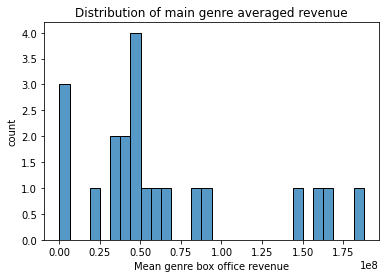

In [153]:
sns.histplot(x=genre_avg_rev,bins=30)
plt.title('Distribution of main genre averaged revenue')
plt.xlabel('Mean genre box office revenue')
plt.ylabel('count')
plt.show()

We can see that the revenue distributions of films by main genre differ.

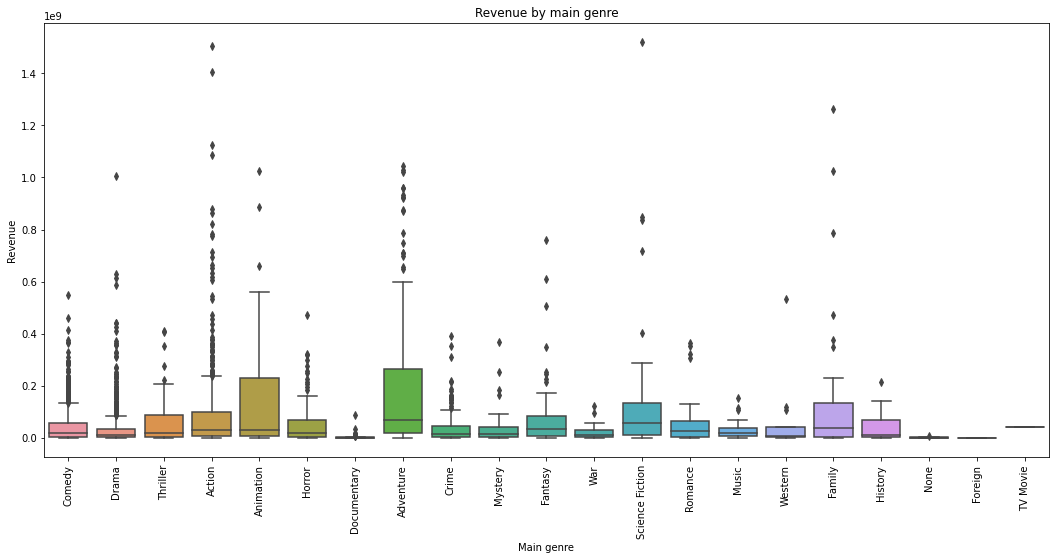

In [154]:
plt.subplots(figsize=(18,8))
sns.boxplot(x='main_genre',y='revenue',data=df)
plt.xlabel('Main genre')
plt.xticks(rotation='vertical')
plt.ylabel('Revenue')
plt.title('Revenue by main genre')
plt.show()

We can clearly see that even just looking at the main genre the revenue distributions show differences that might be useful. We will therefore now create dummy variables for tracking all the genres associated with a film, first by main genre, then by adding other genres listed.

In [155]:
#create dummy variables for tracking the main genres

dummies = pd.get_dummies(df['main_genre'])

df = df.drop('main_genre',axis = 1)
# Join the encoded df
df = df.join(dummies)
df.head()

,budget,original_language,popularity,release_date,runtime,Keywords,cast,crew,revenue,homepage_bool,...,Horror,Music,Mystery,None,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,14000000.0,en,6.575393,2015-02-20,93.0,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,0,...,0,0,0,0,0,0,0,0,0,0
1,40000000.0,en,8.248895,2004-08-06,113.0,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,0,...,0,0,0,0,0,0,0,0,0,0
2,3300000.0,en,64.299990,2014-10-10,105.0,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000,1,...,0,0,0,0,0,0,0,0,0,0
3,1200000.0,hi,3.174936,2012-03-09,122.0,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000,1,...,0,0,0,0,0,0,0,1,0,0
4,NaN,ko,1.148070,2009-02-05,118.0,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970,0,...,0,0,0,0,0,0,0,0,0,0


In [163]:
df.columns[29:]

Index(['Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary',
       'Drama', 'Family', 'Fantasy', 'Foreign', 'History', 'Horror', 'Music',
       'Mystery', 'None', 'Romance', 'Science Fiction', 'TV Movie', 'Thriller',
       'War', 'Western'],
      dtype='object')

In [138]:
ind = 0
for sublist in df['genre_name']:
    for column in df.columns[24:-1]:
        if column in sublist[1:]:
            df[column].loc[ind] += 1
    ind += 1
    


In [121]:
print(df['genre_name'][:10])
print(df['Drama'][:10])
print(df['Comedy'][:10])
print(df['Drama'].sum())

0                                      [Comedy]
1              [Comedy, Drama, Family, Romance]
2                                       [Drama]
3                             [Thriller, Drama]
4                            [Action, Thriller]
5                [Animation, Adventure, Family]
6                            [Horror, Thriller]
7                                 [Documentary]
8    [Action, Comedy, Music, Family, Adventure]
9                               [Comedy, Music]
Name: genre_name, dtype: object
0    0
1    1
2    1
3    1
4    0
5    0
6    0
7    0
8    0
9    0
Name: Drama, dtype: int64
0    1
1    1
2    0
3    0
4    0
5    0
6    0
7    0
8    1
9    1
Name: Comedy, dtype: int64
1531


In [122]:
#keywords

df['Keywords']

df['keywords'] = pd.Series(dtype='object')
j = 0
for i in df['Keywords']:
    d = get_dictionary(i)
    if d != {}:
        df['keywords'].iloc[j] = [d[x]['name'] for x in range(0,len(d))]

    else:
         df['keywords'].iloc[j] = np.NaN
    j += 1

df.drop(labels=['Keywords'],axis=1,inplace=True)

In [123]:
df['keywords'][0]

['time travel', 'sequel', 'hot tub', 'duringcreditsstinger']

In [124]:
print(df['keywords'][3:8])
print(df['keywords'].isna().sum())

3    [mystery, bollywood, police corruption, crime,...
4                                                  NaN
5                                                  NaN
6                                                  NaN
7    [journalism, translation, television, manipula...
Name: keywords, dtype: object
276


Keyword information, like our remaining information about cast and crew (specific cast & crew names and demographic information), seems too specific to be of particular use for our modeling.

In [126]:
df.columns

Index(['budget', 'original_language', 'popularity', 'release_date', 'runtime',
       'cast', 'crew', 'revenue', 'homepage_bool',
       'belongs_to_collection_bool', 'prod_companies', 'prod_country',
       'usa_production', 'Paramount Pictures', 'Universal Pictures',
       'Warner Bros.', 'Metro-Goldwyn-Mayer (MGM)', 'Fox', 'Columbia Pictures',
       'Walt Disney Pictures', 'lang_num', 'has_tagline', 'cast_size',
       'crew_size', 'year', 'month', 'weekday', 'genre_name', 'Action',
       'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary', 'Drama',
       'Family', 'Fantasy', 'Foreign', 'History', 'Horror', 'Music', 'Mystery',
       'None', 'Romance', 'Science Fiction', 'TV Movie', 'Thriller', 'War',
       'Western', 'keywords'],
      dtype='object')

We created dummy variables to track all the genres associated with a film, which seems like a promising feature affecting revenue. We reworked the release date variable to track year and month of release separately, as well as whether or not a film was released over the weekend or on a weekday. We previously found correlations between several numerical factors and revenue: popularity, budget, and to a lesser extent, crew and cast size. We will try to investigate these features further in subsequent modeling to see how they relate to one another and further investigate their relationship with our target feature: revenue.

The boolean features we created to track the presence of a variety of categorical data during the data wrangling stage do not appear to have a strong relationship with revenue at this point, but that will be truly determined further in modeling.

In [130]:
df.drop(labels=['cast','crew','prod_country','release_date'],axis=1,inplace=True)

In [128]:
print(df.columns)
print(df.shape)

Index(['budget', 'original_language', 'popularity', 'release_date', 'runtime',
       'cast', 'crew', 'revenue', 'homepage_bool',
       'belongs_to_collection_bool', 'prod_companies', 'prod_country',
       'usa_production', 'Paramount Pictures', 'Universal Pictures',
       'Warner Bros.', 'Metro-Goldwyn-Mayer (MGM)', 'Fox', 'Columbia Pictures',
       'Walt Disney Pictures', 'lang_num', 'has_tagline', 'cast_size',
       'crew_size', 'year', 'month', 'weekday', 'genre_name', 'Action',
       'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary', 'Drama',
       'Family', 'Fantasy', 'Foreign', 'History', 'Horror', 'Music', 'Mystery',
       'None', 'Romance', 'Science Fiction', 'TV Movie', 'Thriller', 'War',
       'Western', 'keywords'],
      dtype='object')
(3000, 50)


Ultimately, thanks to the addition of many new dummy variables for genre, our dataset has widened, but we have also rid ourselves of a lot of unnecessary features moving into the next stages of our modeling.

In [129]:
# save the data to movies_post_eda csv file
df.to_csv('movies_post_eda.csv')